# 1. Импорт библиотек
В качестве модуля работы с нейросетью был выбран Keras.
В нем реализованы

1.   Sequential
2.   Dense
3.   BatchNormalization



In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import itertools as iter

from sklearn.model_selection import train_test_split

#
import keras
# Слои
from keras.models import Sequential
from keras.layers import Dense,Dropout
# Нормализация ошибки
from keras.layers import BatchNormalization

import pandas as pd


# 2. Функция двух переменных для аппроксимации с помощью нейросети

В качестве целевой функции в задаче аппроксимации была  выбрана $$z(x,y)=\frac{cosx}{ln(x^2+10)}\frac{cosy}{ln(y^2+10)}+1 $$
С абсолютным максимумом в т-ке A = (0,0)

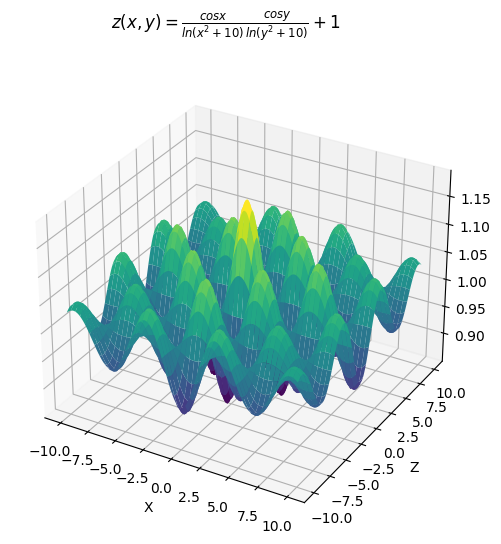

In [ ]:
def Function(x,y):
  return 1 / np.log(x**2 + 10) * np.cos(x) * 1 / np.log(y**2 + 10) * np.cos(y) + 1
# Создаем сетку значений X и Y
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
# Вычисляем значения функции
Z = Function(X,Y)
# Визуализируем функцию
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
#
fig.suptitle(r'$z(x,y)=\frac{cosx}{ln(x^2+10)}\frac{cosy}{ln(y^2+10)}+1$')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylabel('Z')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

In [ ]:
Z

array([[1.03186497, 1.0322972 , 1.03271719, ..., 1.03271719, 1.0322972 ,
        1.03186497],
       [1.0322972 , 1.03273529, 1.03316098, ..., 1.03316098, 1.03273529,
        1.0322972 ],
       [1.03271719, 1.03316098, 1.0335922 , ..., 1.0335922 , 1.03316098,
        1.03271719],
       ...,
       [1.03271719, 1.03316098, 1.0335922 , ..., 1.0335922 , 1.03316098,
        1.03271719],
       [1.0322972 , 1.03273529, 1.03316098, ..., 1.03316098, 1.03273529,
        1.0322972 ],
       [1.03186497, 1.0322972 , 1.03271719, ..., 1.03271719, 1.0322972 ,
        1.03186497]])

## Генерация данных
Monte Carlo

Regular


In [ ]:
# Исследуемые границы
def generate_data(a,b,n,method='random'):
  '''
  a,b - границы
  n - суммарное число точек из области определения f(x,y)
  method - метод генерации данных
  '''
  if method == 'random':
    #
    np.random.seed(14)
    x = np.random.uniform(a, b, n) # Генерируем n точек с x,y
    y = np.random.uniform(a, b, n)
    X = np.vstack((x, y)).T
    return np.float32(X)
  elif method == 'regular':
    n = int(np.sqrt(n))
    x = np.linspace(a, b, n)
    y = np.linspace(a, b, n)
    x, y = np.meshgrid(x, y)
    X = np.vstack((x.ravel(), y.ravel())).T
    return np.float32(X)
  else:
    print('Error!')

In [ ]:
X = generate_data(-10,10,3_000,'regular')
y_output = Function(*X.T)
print('Длина вектора выхода ', len(y_output))

Длина вектора выхода  2916


# 3. Нейронная сеть
На входе принимаемая размерность 2 признака (x,y) на самом последнем слое - 1 выход (z).  
В качестве функций активаций выбраны - ReLu и TanH (на последнем слое)

In [ ]:
def get_model(neurons):
  model = Sequential()
  model.add(Dense(neurons[0],activation='relu',input_dim=2))
  model.add(BatchNormalization())
  for n,neuron_layer in enumerate(neurons[1:]):
    # Последний слой дб tanh'a
    if n != len(neurons) - 2:
      model.add(Dense(neuron_layer,activation='relu'))
    else:
      model.add(Dense(neuron_layer,activation='tanh'))
    model.add(BatchNormalization())
  model.add(Dense(1))
  opt = keras.optimizers.Adam(learning_rate=0.0004)
  model.compile(optimizer=opt, loss='mse', metrics=['mae'])
  return model

#tqdm_callback = TQDMProgressBar()

def train(model,X,y,n_epochs=4):
    hist = model.fit(X,y,
              epochs=n_epochs,
              batch_size=125,
                     )
    return hist.history


# Задание 1.
Обучить сеть на экспериментальных данных (тестовые значения 10% от дата сета) в заданном диапазоне X и Y X.Y∈(min,max) (например x∈(-10,10),y∈(-10,10), глобальный максимум/минимум находится в этом диапазоне) 2-мя способами.


In [ ]:
# Общая конфигурация модели
neurons = [60,60,60]

# Регулярный способ
X=generate_data(-10,10,50_000,'random')
model=get_model(neurons)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                180       
                                                                 
 batch_normalization (Batch  (None, 60)                240       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 batch_normalization_1 (Bat  (None, 60)                240       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 batch_normalization_2 (Bat  (None, 60)                2

In [ ]:
train(model,X,Function(*X.T))

Epoch 1/4
1429/1429 [==============================] - 6s 3ms/step - loss: 0.3501 - mae: 0.4390
Epoch 2/4
1429/1429 [==============================] - 4s 3ms/step - loss: 0.0541 - mae: 0.1801
Epoch 3/4
1429/1429 [==============================] - 4s 3ms/step - loss: 0.0177 - mae: 0.1045
Epoch 4/4
1429/1429 [==============================] - 4s 3ms/step - loss: 0.0080 - mae: 0.0707


{'loss': [0.35012394189834595,
  0.05406828224658966,
  0.017684854567050934,
  0.007983814924955368],
 'mae': [0.4389692544937134,
  0.18011459708213806,
  0.10452557355165482,
  0.07066956907510757]}

In [ ]:
Z_p = model.predict(X).squeeze()

1563/1563 [==============================] - 3s 2ms/step


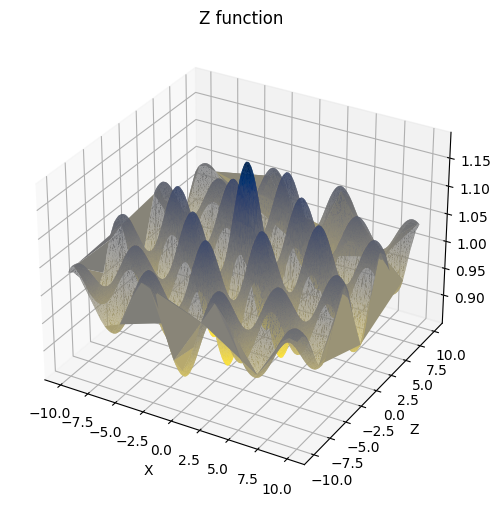

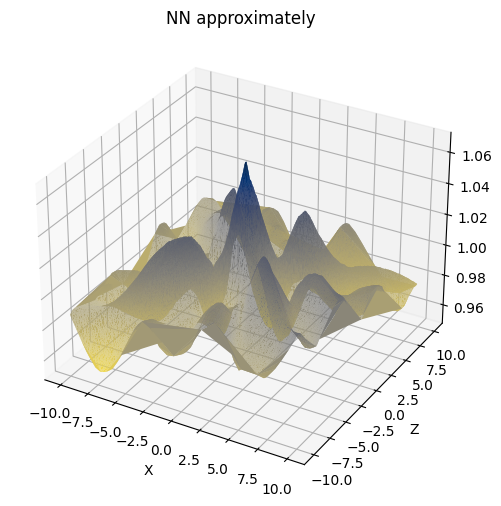

In [ ]:
x = X[:,0]
y = X[:,1]
# Функция
Z_ = Function(x,y)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x,y,Z_,cmap='cividis_r')

#
plt.xlabel('X')
plt.ylabel('Y')
plt.ylabel('Z')
plt.title('Z function')
plt.show()

#
fig2 = plt.figure(figsize=(12, 6))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_trisurf(x,y,Z_p,cmap='cividis_r')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylabel('Z')
plt.title('NN approximately')
plt.show()

In [ ]:
Z_

array([0.90964663, 0.94418645, 1.0101522 , ..., 0.9982692 , 1.0346445 ,
       0.97623974], dtype=float32)

In [ ]:
# Общая конфигурация модели
neurons = [60,60,60]

# Регулярный способ
X_reg = generate_data(-10,10,100_000,'regular')
y_output_reg = Function(*X_reg.T)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_output_reg, test_size=0.1, random_state=2)
# Установка нейронов по слоям
model = get_model(neurons)
# Обучение
hist_reg = train(model,X_train_r,y_train_r)
# Предсказание
y_predict_r = model.predict(X_test_r) # сравнить  c y_test_r


# Монте-Карло
X_rand = generate_data(-10,10,100_000)
y_output_rand = Function(*X_rand.T)
X_train_rd, X_test_rd, y_train_rd, y_test_rd = train_test_split(X_rand, y_output_rand, test_size=0.1, random_state=2)
# Установка нейронов по слоям
model = get_model(neurons)
# Обучение
model = get_model(neurons)
hist_rand = train(model,X_train_rd,y_train_rd)
# Предсказание
y_predict_rd = model.predict(X_test_rd)

Epoch 1/4
2568/2568 [==============================] - 9s 3ms/step - loss: 0.0448 - mae: 0.1125
Epoch 2/4
2568/2568 [==============================] - 6s 2ms/step - loss: 0.0032 - mae: 0.0447
Epoch 3/4
2568/2568 [==============================] - 7s 3ms/step - loss: 0.0024 - mae: 0.0392
Epoch 4/4
313/313 [==============================] - 1s 3ms/step
Epoch 1/4
2572/2572 [==============================] - 10s 3ms/step - loss: 0.0464 - mae: 0.1111
Epoch 2/4
2572/2572 [==============================] - 8s 3ms/step - loss: 0.0029 - mae: 0.0425
Epoch 3/4
2572/2572 [==============================] - 8s 3ms/step - loss: 0.0023 - mae: 0.0382
Epoch 4/4
313/313 [==============================] - 1s 2ms/step


In [ ]:
# Оценка
print('''Средняя квадратичная ошибка для регулярного способа {}
Средняя квадратичная ошибка для Монте-Карло  {}
'''.format(np.round(np.mean(y_predict_rd - y_test_rd)**2,6),
np.round(np.mean(y_predict_r - y_test_r)**2,6)))

Средняя квадратичная ошибка для регулярного способа 5.3e-05
Средняя квадратичная ошибка для Монте-Карло  0.000226



In [ ]:
len(y_train_r)

89870

##Вывод: Случайный способ генерации данных показывает большую точность. Следовательно, его будем использовать только его в следующих экспериментах.Также в силу того, что тестовая выборка значительно меньше, на ней показатели точности в несколько порядков раз меньше.

# Задание 2. Выявить зависимость «емкости» обучения и точности работы нейронной сети, построить график.
Сделать вывод о зависимости точности нейронной сети от числа обучаемой выборки

In [ ]:
sample_sizes = [x for x in range(1_100,12_850,750)]
# 10 % test; 90% train
train_size = [sample*0.9 for sample in sample_sizes]
print('Приблизительные размеры обучающих выборок:', train_size)

Приблизительные размеры обучающих выборок: [990.0, 1665.0, 2340.0, 3015.0, 3690.0, 4365.0, 5040.0, 5715.0, 6390.0, 7065.0, 7740.0, 8415.0, 9090.0, 9765.0, 10440.0, 11115.0]


In [ ]:
neurons = [60,60,60]
#
res = []
#
for sample in sample_sizes:
  # Генерация данных
  X  = generate_data(-10,10,sample,'regular')
  # Вычисление функции
  y_output = Function(*X.T)
  # Разбивка в 90/10
  X_train, X_test, y_train, y_test = train_test_split(X, y_output, test_size=.1, random_state=2)
  ###
  model = get_model(neurons)
  train(model,X_train,y_train)
  y_pred = model.predict(X_test)
  mse = np.round(np.mean((y_pred - y_test)**2),12)
  # Заносим размер обучающей выборки и MSE полученную на тесте
  res.append((len(X_train),mse))

Epoch 1/4
29/29 [==============================] - 4s 4ms/step - loss: 1.4056 - mae: 1.0017
Epoch 2/4
29/29 [==============================] - 0s 3ms/step - loss: 0.7469 - mae: 0.8271
Epoch 3/4
29/29 [==============================] - 0s 4ms/step - loss: 0.5594 - mae: 0.7175
Epoch 4/4
4/4 [==============================] - 0s 4ms/step
Epoch 1/4
48/48 [==============================] - 2s 4ms/step - loss: 1.1322 - mae: 0.9530
Epoch 2/4
48/48 [==============================] - 0s 4ms/step - loss: 0.5508 - mae: 0.7069
Epoch 3/4
48/48 [==============================] - 0s 4ms/step - loss: 0.3223 - mae: 0.5320
Epoch 4/4
6/6 [==============================] - 0s 2ms/step
Epoch 1/4
67/67 [==============================] - 2s 3ms/step - loss: 0.9217 - mae: 0.8765
Epoch 2/4
67/67 [==============================] - 0s 2ms/step - loss: 0.4069 - mae: 0.6074
Epoch 3/4
67/67 [==============================] - 0s 3ms/step - loss: 0.1774 - mae: 0.3871
Epoch 4/4
9/9 [==============================] - 0

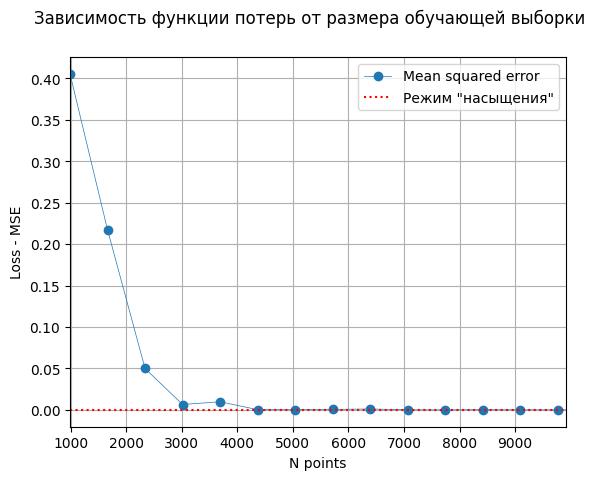

In [ ]:
tab = pd.DataFrame(res,columns=['N points','Mean squared error']).set_index('N points')
ax=tab.plot(marker='o',linewidth=0.5)
plt.ylabel('Loss - MSE')
plt.gcf().suptitle('Зависимость функции потерь от размера обучающей выборки')
ax.set_xlim([tab.index.min(),tab.index.max()-1200])
plt.axhline(linestyle=':',color='red',label='Режим "насыщения"',linewidth=1.5)
plt.grid(True)
plt.legend()
plt.show()

## Вывод: При ~ 6_000 достаточно оптимальное количество точек для обучения нейросети. Кроме того, можно отметить, что с ростом размера обучающей выборки функция ошибки уменьшается, а следовательно предсказания становятся точнее.

# Задание 3
Зависимость числа нейронов (общего) на точность нейронной сети. Выявить оптимальное число нейронов, показать на графике выход на «режим насыщения»

In [ ]:
list(range(25,700,75))

[25, 100, 175, 250, 325, 400, 475, 550, 625]

In [ ]:
res_by_neurons = []

X  = generate_data(-10,10,6_000)
# Вычисление функции
y_output = Function(*X.T)
# 90/10
X_train, X_test, y_train, y_test = train_test_split(X, y_output, test_size=.1, random_state=2)

for neurons in range(25,925,65):
  total = [neurons  for i in range(3)]
  model = get_model(total)
  ###
  train(model,X_train,y_train)
  y_pred = model.predict(X_test)
  mse = np.round(np.mean(y_pred - y_test)**2,12)
  # Заносим общее число нейронов и MSE полученную на тесте
  res_by_neurons.append((neurons,mse))


Epoch 1/4
44/44 [==============================] - 4s 3ms/step - loss: 1.2197 - mae: 0.9699
Epoch 2/4
44/44 [==============================] - 0s 3ms/step - loss: 0.7384 - mae: 0.8315
Epoch 3/4
44/44 [==============================] - 0s 3ms/step - loss: 0.5474 - mae: 0.7219
Epoch 4/4
19/19 [==============================] - 0s 2ms/step
Epoch 1/4
44/44 [==============================] - 2s 3ms/step - loss: 1.0587 - mae: 0.9225
Epoch 2/4
44/44 [==============================] - 0s 3ms/step - loss: 0.4695 - mae: 0.6672
Epoch 3/4
44/44 [==============================] - 0s 3ms/step - loss: 0.2420 - mae: 0.4722
Epoch 4/4
19/19 [==============================] - 0s 2ms/step
Epoch 1/4
44/44 [==============================] - 2s 5ms/step - loss: 0.8679 - mae: 0.8710
Epoch 2/4
44/44 [==============================] - 0s 6ms/step - loss: 0.3889 - mae: 0.6059
Epoch 3/4
44/44 [==============================] - 0s 6ms/step - loss: 0.1596 - mae: 0.3781
Epoch 4/4
19/19 [=============================

In [ ]:
# for neurons in range(720,900,115):
#   total = [neurons  for i in range(3)]
#   model = get_model(total)
#   ###
#   train(model,X_train,y_train)
#   y_pred = model.predict(X_test)
#   mse = np.round(np.mean(y_pred - y_test)**2,12)
#   # Заносим общее число нейронов и MSE полученную на тесте
#   res_by_neurons.append((neurons,mse))

Epoch 1/4
44/44 [==============================] - 3s 37ms/step - loss: 2.0241 - mae: 0.9808
Epoch 2/4
44/44 [==============================] - 2s 42ms/step - loss: 0.1137 - mae: 0.2945
Epoch 3/4
44/44 [==============================] - 1s 27ms/step - loss: 0.0122 - mae: 0.0882
Epoch 4/4
19/19 [==============================] - 0s 4ms/step
Epoch 1/4
44/44 [==============================] - 3s 39ms/step - loss: 3.4033 - mae: 1.1628
Epoch 2/4
44/44 [==============================] - 2s 39ms/step - loss: 0.1158 - mae: 0.2818
Epoch 3/4
44/44 [==============================] - 2s 37ms/step - loss: 0.0136 - mae: 0.0929
Epoch 4/4
19/19 [==============================] - 0s 5ms/step


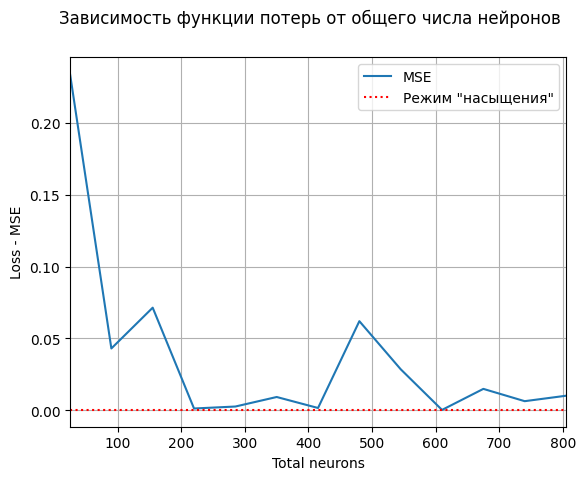

In [ ]:
tab = pd.DataFrame(res_by_neurons,columns=['Total neurons','MSE']).set_index('Total neurons')
ax = tab.plot()

plt.ylabel('Loss - MSE')
plt.gcf().suptitle('Зависимость функции потерь от общего числа нейронов')
ax.set_xlim([tab.index.min(),tab.index.max()-65])
#plt.axhline(linestyle=':',color='red',label='Режим "насыщения"')
plt.axhline(linestyle=':',color='red',label='Режим "насыщения"',linewidth=1.5)
plt.grid(True)
plt.legend()
plt.show()

# Задание 5.
Выявить зависимость числа слоев и распределения нейронов в слоях и точности получаемых результатов (т.е. выявить влияние числа нейронов и слоев на точность)

In [ ]:
layers_variables = [[int(200/n)]*n for n in range(1,5)]

In [ ]:
for n,layers in enumerate(layers_variables):
  print('Число слоев {}, число нейронов по слоям {}'.format(n+1,layers))

Число слоев 1, число нейронов по слоям [200]
Число слоев 2, число нейронов по слоям [100, 100]
Число слоев 3, число нейронов по слоям [66, 66, 66]
Число слоев 4, число нейронов по слоям [50, 50, 50, 50]


In [ ]:
res_by_layers = []

X  = generate_data(-10,10,6_000)
# Вычисление функции
y_output = Function(*X.T)
# 90/10
X_train, X_test, y_train, y_test = train_test_split(X, y_output, test_size=.1, random_state=2)

for n,layers in enumerate(layers_variables):
    for m in range(0,20):
      model = get_model(layers)
    ###
      train(model,X_train,y_train)
      y_pred = model.predict(X_test)
      mse = np.round(np.mean((y_pred - y_test)**2),12)
    # Заносим общее число нейронов и MSE полученную на тесте
      res_by_layers.append((n+1,mse,m))

Epoch 1/4
44/44 [==============================] - 1s 3ms/step - loss: 1.5560 - mae: 1.0130
Epoch 2/4
44/44 [==============================] - 0s 3ms/step - loss: 0.3878 - mae: 0.5628
Epoch 3/4
44/44 [==============================] - 0s 2ms/step - loss: 0.1285 - mae: 0.3330
Epoch 4/4
19/19 [==============================] - 0s 2ms/step
Epoch 1/4
44/44 [==============================] - 1s 4ms/step - loss: 0.9868 - mae: 0.8757
Epoch 2/4
44/44 [==============================] - 0s 4ms/step - loss: 0.3369 - mae: 0.5591
Epoch 3/4
44/44 [==============================] - 0s 4ms/step - loss: 0.1204 - mae: 0.3269
Epoch 4/4
19/19 [==============================] - 0s 2ms/step
Epoch 1/4
44/44 [==============================] - 1s 2ms/step - loss: 0.8144 - mae: 0.8508
Epoch 2/4
44/44 [==============================] - 0s 3ms/step - loss: 0.3157 - mae: 0.5503
Epoch 3/4
44/44 [==============================] - 0s 3ms/step - loss: 0.0996 - mae: 0.3041
Epoch 4/4
19/19 [=============================

In [ ]:
tab = pd.DataFrame(res_by_layers,columns=['Layers','MSE','n'])
tab.head()

,Layers,MSE,n
0,1,0.002447,0
1,1,0.000173,1
2,1,0.000491,2
3,1,0.001029,3
4,1,0.027893,4


In [ ]:
tab.size

240

Text(0.5, 0.98, 'Показатель MSE от количества слоев в модели')

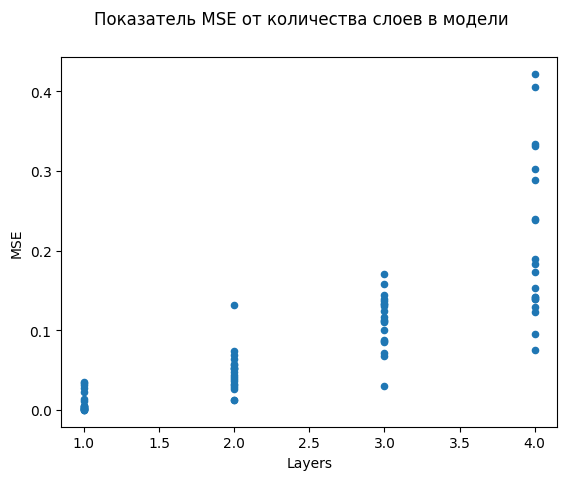

In [ ]:

tab.plot.scatter(x='Layers',y='MSE')
plt.gcf().suptitle('Показатель MSE от количества слоев в модели')

Вывод: оптимальнее всего использовать распределение по наименьшем числу слоев,тк видно, что нижняя граница с увелечением слоев становится все выше, а значит нет смысла увеличивать количество слоев.

*Для дальнейшего исследования распределения числа нейронов по слоям возьмем - 3 слоя, по упорядочив их по разному*.

# Задание 6.

In [ ]:
# total = 200
order = {
    'uniformly':[66, 66, 66],
    'asc':
    {

               'disbalance':[10,90,100],
               'balance':[50,70,80]
    },
    'desasc': {

               'disbalance':[100,90,10],
               'balance':[80,70,50]
    }
    }
  np.random.seed(100)

In [ ]:
order['desasc']

{'disbalance': [100, 90, 10], 'balance': [80, 70, 50]}

In [ ]:
res_by_order_neurons = []
X  = generate_data(-10,10,6_000)
# Вычисление функции
y_output = Function(*X.T)
# 90/10
X_train, X_test, y_train, y_test = train_test_split(X, y_output, test_size=.1, random_state=2)

for sort in order.keys():
  for n in range(30):
    is_balance = 'None'
    # Подбросить монетку, от этого выбрать распорядок нейронов
    if sort != 'uniformly':
      is_balance = 'balance' if np.random.choice([0,1]) == 1 else 'disbalance'
      neurons = order[sort][is_balance]
    else:
      neurons = order[sort]
    model = get_model(neurons)
    ###
    train(model,X_train,y_train)
    y_pred = model.predict(X_test)
    mse = np.round(np.mean(y_pred - y_test)**2,12)
    # Заносим общее число нейронов и MSE полученную на тесте
    res_by_order_neurons.append((sort,is_balance,mse,n))



Epoch 1/4
44/44 [==============================] - 2s 5ms/step - loss: 1.1930 - mae: 0.9677
Epoch 2/4
44/44 [==============================] - 0s 8ms/step - loss: 0.5868 - mae: 0.7474
Epoch 3/4
44/44 [==============================] - 0s 7ms/step - loss: 0.3663 - mae: 0.5894
Epoch 4/4
19/19 [==============================] - 0s 3ms/step
Epoch 1/4
44/44 [==============================] - 2s 5ms/step - loss: 1.0686 - mae: 0.9263
Epoch 2/4
44/44 [==============================] - 0s 5ms/step - loss: 0.5443 - mae: 0.7180
Epoch 3/4
44/44 [==============================] - 0s 4ms/step - loss: 0.3186 - mae: 0.5464
Epoch 4/4
19/19 [==============================] - 0s 2ms/step
Epoch 1/4
44/44 [==============================] - 2s 5ms/step - loss: 1.0405 - mae: 0.9349
Epoch 2/4
44/44 [==============================] - 0s 5ms/step - loss: 0.5535 - mae: 0.7282
Epoch 3/4
44/44 [==============================] - 0s 5ms/step - loss: 0.3303 - mae: 0.5589
Epoch 4/4
19/19 [=============================

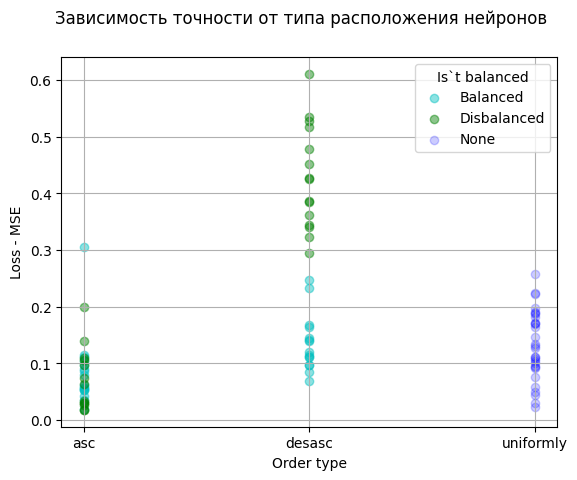

In [ ]:
df_order = pd.DataFrame(res_by_order_neurons,columns=['Order','is_balance','Loss - MSE','n'])

x,y = df_order.query('is_balance =="balance"')[['Order','Loss - MSE']].items()
x_,y_ = df_order.query('is_balance =="disbalance"')[['Order','Loss - MSE']].items()
x_u,y_u = df_order.query('is_balance =="None"')[['Order','Loss - MSE']].items()


plt.scatter(x[1:][0],y[1:][0],color='c',alpha=0.45)
plt.scatter(x_[1:][0],y_[1:][0],color='g',alpha=0.45,marker='o')
plt.scatter(x_u[1:][0],y_u[1:][0],color='b',alpha=0.2)
plt.ylabel('Loss - MSE')
plt.xlabel('Order type')

#
plt.gcf().suptitle('Зависимость точности от типа расположения нейронов')
#
plt.legend(['Balanced','Disbalanced','None'],title='Is`t balanced')
plt.grid(True)
None

In [ ]:
df_order

,Order,is_balance,Loss - MSE,n
0,uniformly,None,0.127128,0
1,uniformly,None,0.108420,1
2,uniformly,None,0.171585,2
3,uniformly,None,0.164000,3
4,uniformly,None,0.187848,4
...,...,...,...,...
85,desasc,balance,0.142081,25
86,desasc,balance,0.084474,26
87,desasc,balance,0.111692,27
88,desasc,disbalance,0.384805,28


# Выбор конечной оптимальной модели для задачи аппроксимации целевой функции

In [ ]:
# Общая конфигурация модели
neurons = [14,80,106]
# Регулярный способ
X=generate_data(-10,10,7_000,'regular')
y=Function(*X.T)
# Модели с разными конфигируцаиями
model=get_model(neurons)
# Разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)
# Обучение моделей
train(model,X_train,y_train,n_epochs=15)
# Сверка точности
y_pred = model.predict(X_test)

#
MSE = np.mean((y_test-y_pred)**2)
print('''MSE для модели с 3 слоями {}'''.format(MSE))

Epoch 1/15
50/50 [==============================] - 2s 3ms/step - loss: 0.9101 - mae: 0.8764
Epoch 2/15
50/50 [==============================] - 0s 3ms/step - loss: 0.4021 - mae: 0.6148
Epoch 3/15
50/50 [==============================] - 0s 3ms/step - loss: 0.1720 - mae: 0.3918
Epoch 4/15
50/50 [==============================] - 0s 3ms/step - loss: 0.0625 - mae: 0.2206
Epoch 5/15
50/50 [==============================] - 0s 3ms/step - loss: 0.0209 - mae: 0.1173
Epoch 6/15
50/50 [==============================] - 0s 3ms/step - loss: 0.0119 - mae: 0.0870
Epoch 7/15
50/50 [==============================] - 0s 3ms/step - loss: 0.0092 - mae: 0.0767
Epoch 8/15
50/50 [==============================] - 0s 3ms/step - loss: 0.0078 - mae: 0.0701
Epoch 9/15
50/50 [==============================] - 0s 3ms/step - loss: 0.0071 - mae: 0.0668
Epoch 10/15
50/50 [==============================] - 0s 3ms/step - loss: 0.0059 - mae: 0.0601
Epoch 11/15
50/50 [==============================] - 0s 3ms/step - lo

In [ ]:
MSE_exp = np.mean((y_test[:15] - y_pred_1[:15].squeeze())**2)
print('Example calculate MSE\nTest {}\n-----------------------------\nPrediction {}\nMSE: {}'.format(y_test[:15],y_pred_1[:15].squeeze(),MSE_exp))


Example calculate MSE
Test [0.9461429  0.930042   0.91971976 1.0096768  1.040158   1.03195
 1.0099167  0.9803242  0.9990272  0.9968234  0.9591086  0.8598657
 0.9147944  0.92003417 0.94798833]
-----------------------------
Prediction [0.70485693 0.93900967 0.9221605  1.0442646  1.0422764  0.84203964
 0.8073961  1.1256533  1.006689   1.0135932  0.9468357  1.0173494
 0.9208521  0.9530126  0.8368122 ]
MSE: 0.013098879717290401


In [ ]:
y_pred_1[:15].squeeze()

array([0.70485693, 0.93900967, 0.9221605 , 1.0442646 , 1.0422764 ,
       0.84203964, 0.8073961 , 1.1256533 , 1.006689  , 1.0135932 ,
       0.9468357 , 1.0173494 , 0.9208521 , 0.9530126 , 0.8368122 ],
      dtype=float32)

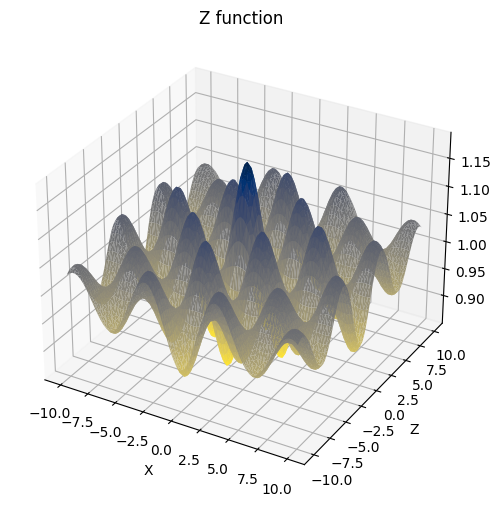

In [ ]:
x = X[:,0]
y = X[:,1]
Z_ = Function(x,y)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x,y,Z_,cmap='cividis_r')

#
plt.xlabel('X')
plt.ylabel('Y')
plt.ylabel('Z')
plt.title('Z function')
plt.show()

In [ ]:
x = X[:,0]
y = X[:,1]
Z_1 = model.predict(X).squeeze()

216/216 [==============================] - 0s 1ms/step


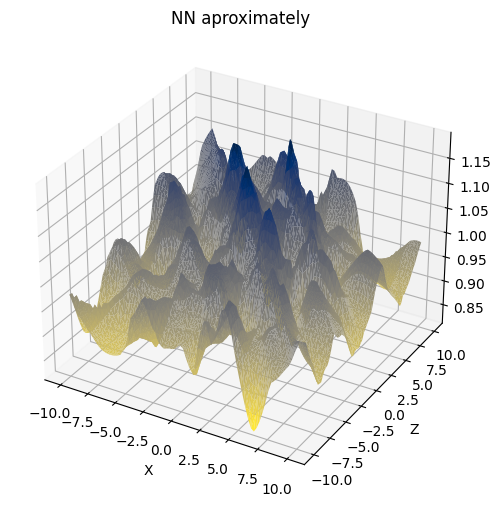

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x,y,Z_1,cmap='cividis_r')

#
plt.xlabel('X')
plt.ylabel('Y')
plt.ylabel('Z')
plt.title('NN aproximately')
plt.show()

# График разности между аппроксимирующей поверхностью и поверхностью аналитической функции


In [ ]:
# Общая конфигурация модели
neurons = [14,80,106]
# Регулярный способ
X=generate_data(-10,10,6_000,'regular')
y=Function(*X.T)
# Модели с разными конфигируцаиями
model=get_model(neurons)
# Разделение
x,y = X[:,0],X[:,1]
# Обучение моделей
train(model,X_train,y_train,n_epochs=15)
# Сверка точности
y_pred = model.predict(X)

Epoch 1/15
50/50 [==============================] - 3s 3ms/step - loss: 1.0517 - mae: 0.8938
Epoch 2/15
50/50 [==============================] - 0s 3ms/step - loss: 0.3869 - mae: 0.5989
Epoch 3/15
50/50 [==============================] - 0s 3ms/step - loss: 0.1639 - mae: 0.3774
Epoch 4/15
50/50 [==============================] - 0s 3ms/step - loss: 0.0580 - mae: 0.2113
Epoch 5/15
50/50 [==============================] - 0s 4ms/step - loss: 0.0206 - mae: 0.1170
Epoch 6/15
50/50 [==============================] - 0s 3ms/step - loss: 0.0126 - mae: 0.0882
Epoch 7/15
50/50 [==============================] - 0s 3ms/step - loss: 0.0082 - mae: 0.0715
Epoch 8/15
50/50 [==============================] - 0s 3ms/step - loss: 0.0079 - mae: 0.0697
Epoch 9/15
50/50 [==============================] - 0s 3ms/step - loss: 0.0077 - mae: 0.0698
Epoch 10/15
50/50 [==============================] - 0s 3ms/step - loss: 0.0062 - mae: 0.0627
Epoch 11/15
50/50 [==============================] - 0s 3ms/step - lo

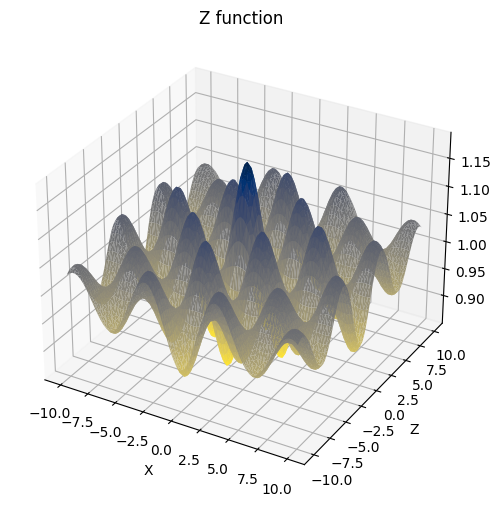

In [ ]:
x = X[:,0]
y = X[:,1]
Z_ = Function(x,y)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x,y,Z_,cmap='cividis_r')

#
plt.xlabel('X')
plt.ylabel('Y')
plt.ylabel('Z')
plt.title('Z function')
plt.show()

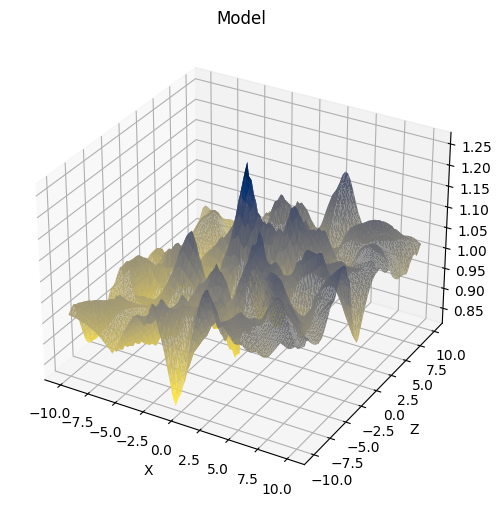

In [ ]:
x = X[:,0]
y = X[:,1]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x,y,y_pred.squeeze(),cmap='cividis_r')

#
plt.xlabel('X')
plt.ylabel('Y')
plt.ylabel('Z')
plt.title('Model')
plt.show()

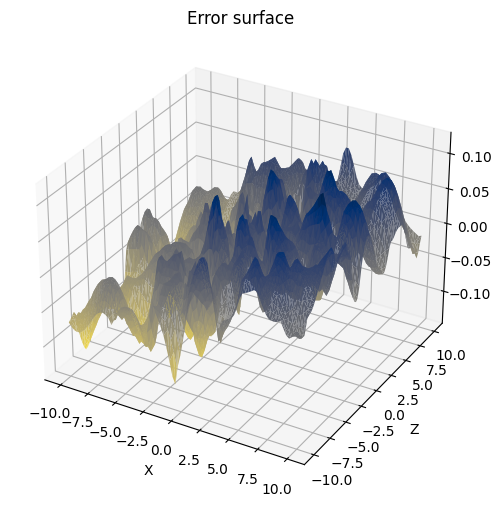

In [ ]:
x = X[:,0]
y = X[:,1]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x,y,(y_pred.squeeze()-Z_),cmap='cividis_r')

#
plt.xlabel('X')
plt.ylabel('Y')
plt.ylabel('Z')
plt.title('Error surface')
plt.show()